In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yangsy-c\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
import baostock as bs
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)

# 获取茅台的收盘价
maotai = bs.query_history_k_data_plus("sz.300750", "date,code,open,high,low,close,volume", start_date='2020-01-01',
                                      end_date='2021-06-29', frequency="d", adjustflag="3")
data_list = []
while (maotai.error_code == '0') & maotai.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(maotai.get_row_data())
mt = pd.DataFrame(data_list, columns=maotai.fields)
print(mt.info())

login success!
login respond error_code:0
login respond  error_msg:success
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    360 non-null    object
 1   code    360 non-null    object
 2   open    360 non-null    object
 3   high    360 non-null    object
 4   low     360 non-null    object
 5   close   360 non-null    object
 6   volume  360 non-null    object
dtypes: object(7)
memory usage: 19.8+ KB
None


In [5]:
mt.head(5)

,date,code,open,high,low,close,volume
0,2020-01-02,sz.300750,107.2100,108.8500,105.7000,107.5200,20611589
1,2020-01-03,sz.300750,107.5200,110.1900,105.9700,109.5500,18084178
2,2020-01-06,sz.300750,111.3000,114.5000,107.8000,109.0900,26500200
3,2020-01-07,sz.300750,109.0100,109.6400,107.4100,108.5000,13507544
4,2020-01-08,sz.300750,109.0100,111.5000,107.1000,109.6000,19224068


In [15]:
mt.columns

Index(['date', 'code', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [22]:
mt['date'] = mt['date'].astype('string')
mt['code'] = mt['code'].astype('string')

In [21]:
for each in ['open', 'high', 'low', 'close', 'volume']:
    mt[each] = mt[each].astype('float')

In [23]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    360 non-null    string 
 1   code    360 non-null    string 
 2   open    360 non-null    float64
 3   high    360 non-null    float64
 4   low     360 non-null    float64
 5   close   360 non-null    float64
 6   volume  360 non-null    float64
dtypes: float64(5), string(2)
memory usage: 19.8 KB


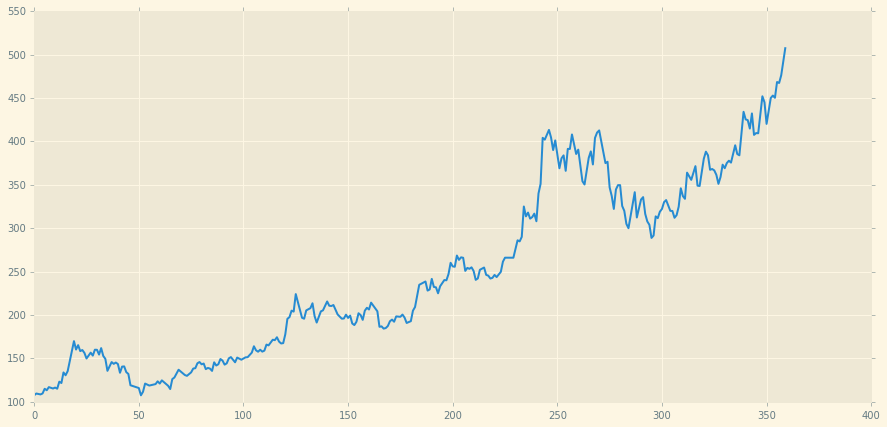

In [32]:
%matplotlib inline
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,7))
plt.plot(range(len(mt['close'].to_list())), mt['close'])

In [27]:
help(plt.style)

Help on package matplotlib.style in matplotlib:

NAME
    matplotlib.style

PACKAGE CONTENTS
    core

DATA
    available = ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtye...
    library = {'Solarize_Light2': RcParams({'axes.axisbelow': True,
          ...

FILE
    c:\users\yangsy-c\anaconda3\lib\site-packages\matplotlib\style\__init__.py




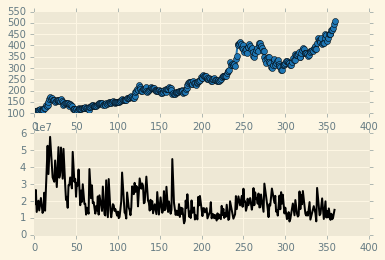

In [36]:
plt.figure()
plt.subplot(211)
plt.plot(range(len(mt['close'].to_list())), mt['close'], color='tab:blue', marker='o')
plt.subplot(212)
plt.plot(range(len(mt['close'].to_list())), mt['volume'], color='black')
plt.show()

In [37]:
mt.describe()

,open,high,low,close,volume
count,360.000000,360.000000,360.000000,360.000000,3.600000e+02
mean,246.218083,252.210972,240.299306,246.645556,1.928764e+07
std,101.751506,104.341998,99.003173,102.195425,8.834766e+06
min,107.210000,108.850000,105.010000,107.480000,6.801208e+06
25%,154.400000,159.285000,150.640000,153.770000,1.298541e+07
50%,214.150000,220.635000,209.455000,214.925000,1.705230e+07
75%,335.000000,343.582500,327.230000,336.100000,2.295266e+07
max,513.650000,519.600000,504.220000,508.510000,5.791899e+07


In [45]:
mt.loc[:10, 'open']

0     107.21
1     107.52
2     111.30
3     109.01
4     109.01
5     112.00
6     114.20
7     116.00
8     119.51
9     115.70
10    116.00
Name: open, dtype: float64

In [42]:
mt['date'].head()

0    2020-01-02
1    2020-01-03
2    2020-01-06
3    2020-01-07
4    2020-01-08
Name: date, dtype: string

In [46]:
mt.iloc[:10, :10]

,date,code,open,high,low,close,volume
0,2020-01-02,sz.300750,107.21,108.85,105.70,107.52,20611589.0
1,2020-01-03,sz.300750,107.52,110.19,105.97,109.55,18084178.0
2,2020-01-06,sz.300750,111.30,114.50,107.80,109.09,26500200.0
3,2020-01-07,sz.300750,109.01,109.64,107.41,108.50,13507544.0
4,2020-01-08,sz.300750,109.01,111.50,107.10,109.60,19224068.0
5,2020-01-09,sz.300750,112.00,115.50,110.01,115.00,20164351.0
6,2020-01-10,sz.300750,114.20,114.20,111.68,113.31,14428007.0
7,2020-01-13,sz.300750,116.00,118.48,114.20,116.90,21597445.0
8,2020-01-14,sz.300750,119.51,120.75,115.18,115.70,21768473.0
9,2020-01-15,sz.300750,115.70,117.58,112.21,115.30,17758720.0


In [ ]:
"""
loc是切割,先行后列
iloc也是切割,先行后列,用数字就可以了
"""